In [1]:
%matplotlib inline

# Beta Dimentionality Reduction (t-SNE plots)

<big>This notebook includes code and instructions to re-generate figures included in the Data Descriptor article for the CNeuroMod-THINGS dataset. These figures feature color-coded (annotated) **t-NSE plots derived from trial-wise and image-wise beta weights** estimated from the THINGS dataset with GLMsingle, as shown in **Figures 5 and 6**.</big>

<br/>

---

# 0 | Installation

### Note:
If you are following these instructiuons on Github, we recommend that you view this Notebook through [https://nbviewer.org](https://nbviewer.org/github/courtois-neuromod/cneuromod-things/blob/main/datapaper/notebooks/beta_dimReduction.ipynb) for a more accurate rendering and improved readability. 

### 0.1 | Install required Python libraries
To run this Notebook and re-create figures, you need to install the following Python libraries (e.g., inside a virtual environment). 

```shell
jupyter==1.0.0
numpy==1.24.4
pandas==1.3.5
matplotlib==3.7.5
```
<br/>

---

### 0.2 | Install the CNeuroMod-THINGS dataset

To generate figures, you need to download a few files from the CNeuroMod-THINGS dataset. 

Use the DataLad software (version > 1.0.0, https://www.datalad.org/) to clone the `cneuromod-things` repository. 
DataLad is a versionning tool to manage large data structures organized in git repositories available for Linux, OSX and Windows. 

Note: the command below installs **symbolic links without downloading heavy files** onto your local machine.

```bash
datalad clone git@github.com:courtois-neuromod/cneuromod-things.git
```
<br/>

---


### 0.3 | Pull the data files needed to generate figures

Before you can run this Notebook, you need to **download a few input files** onto your local machine. 

Inside the newly cloned `cneuromod-things` repository, first navigate to `cneuromod-things/THINGS/glmsingle`, which is a submodule inside the main repository. Upon installation, the `glmsingle` submodule will appear empty. 

```bash
cd cneuromod-things/THINGS/glmsingle
ls
```
<br/>

Use DataLad to download the `glmsingle` submodule's symbolic links and files stored directly on Github (**no large files will be pulled**).

```bash
datalad get *
ls
```
<br/>

Make sure that the file `task-things_imgAnnotations.json` is listed in the `glmsingle` submodule. 

Finally, use DataLad to download the files that contain the t-SNE scores onto your local machine (pulled from remote server via symbolic links).

```bash
datalad get sub-*/descriptive/sub-*_task-things_space-T1w_stat-tSNE_label-visualROIs_desc-*_statseries.npz
```
<br/>



---
### 0.4 | Launch the Jupyter Notebook

Inside `cneuromod-things`, navigate to the tutorial section, and open the current Jupyter Notebook (beta_dimReduction.ipynb)
```bash
cd cneuromod-things/datapaper/notebooks
jupyter notebook
```
<br/>

---
# 1 | Import Python libraries

Run the code below to import Python libraries.

In [2]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 

print('matplotlib version: ', mpl.__version__)
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)


matplotlib version:  3.7.5
numpy version:  1.24.4
pandas version:  1.3.5



---

# 2 | Define support functions, paths and parameters

Run the code below to define support functions, resolve relative paths and define ploting parameters 

In [3]:
"""
Support functions & variables used to construct 
the "y" data matrix (with stimulus labels and annotations)
"""

def get_val(row, value):
    return image_details[row['image_name']][value]

def is_member_of(row, cat_name):
    return cat_name in row['highercat53_names']

img_vals = ['image_category', 'things_image_nr', 'things_category_nr', 
            'categ_arousal', 'categ_be_moved', 'categ_concreteness', 
            'categ_consistency', 'categ_grasp', 'categ_heavy', 
            'categ_hold', 'categ_living', 'categ_manmade', 
            'categ_moves', 'categ_nameability', 'categ_natural', 
            'categ_pleasant', 'categ_precious', 'categ_size',
            'categ_wordfreq_COCA', 'highercat27_names', 
            'highercat53_names', 'highercat53_num', 'img_consistency', 
            'img_nameability', 
            'manual_face', 'manual_body', 'manual_lone_object', 'manual_human_face',
            'manual_human_body', 'manual_nh_mammal_face', 'manual_nh_mammal_body',
            'manual_central_face', 'manual_central_body', 'manual_artificial_face',
            'manual_artificial_body', 'manual_scene', 'manual_rich_background']

cat_vals = ['animal', 'arts and crafts supply', 'electronic device', 'clothing',
            'food', 'plant', 'fruit', 'vegetable', 'tool', 'vehicle', 'furniture']


"""
Resolve relative paths
"""
data_file_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()


"""
Load image labels and annotations
"""
with open(f"{data_file_path}/task-things_imgAnnotations.json", "r") as f:
    image_details = json.load(f)


"""    
Define the graph dimensions (in x and y) 
per subject for each ROI.    
"""
graph_dimensions = {
    "perImage": {
        '01': {
            'x': {
                "face_FFA_OFA": (-19.5, 17.5),
                "scene_PPA_MPA_OPA": (-14, 12),
                "V1_V2_V3": (-14.5, 15),
                "floc_3contrasts": (-13, 11),
                "floc_3contrasts_lowthresh": (-15.5, 14.5), # FIX
                "top_NC": (-21.5, 22),                
            },
            'y': {
                "face_FFA_OFA": (-15, 14),
                "scene_PPA_MPA_OPA": (-14, 13.5),
                "V1_V2_V3": (-17.5, 18.5),
                "floc_3contrasts": (-20, 19),
                "floc_3contrasts_lowthresh": (-15.5, 17.5), # FIX
                "top_NC": (-15, 17),                
            },
        },
        '02': {
            'x': {
                "face_FFA_OFA": (-11.5, 11.5),
                "scene_PPA_MPA_OPA": (-20.5, 20.5),
                "V1_V2_V3": (-15.5, 15.5),
                "floc_3contrasts": (-18, 20),
                "floc_3contrasts_lowthresh": (-15, 14), # FIX
                "top_NC": (-31, 31),      
            },
            'y': {
                "face_FFA_OFA": (-22, 22),
                "scene_PPA_MPA_OPA": (-12, 11),
                "V1_V2_V3": (-13, 14),
                "floc_3contrasts": (-15, 15),
                "floc_3contrasts_lowthresh": (-16.5, 16.5), # FIX
                "top_NC": (-18.5, 17),           
            },
        },
        '03': {
            'x': {
                "face_FFA_OFA": (-20, 20),
                "scene_PPA_MPA_OPA": (-29.5, 32.5),
                "V1_V2_V3": (-20, 21),
                "floc_3contrasts": (-28.5, 28),
                "floc_3contrasts_lowthresh": (-21, 21), # FIX
                "top_NC": (-31, 27),       
            },
            'y': {
                "face_FFA_OFA": (-25.5, 28),
                "scene_PPA_MPA_OPA": (-19, 18),
                "V1_V2_V3": (-23.5, 22),
                "floc_3contrasts": (-21, 19),
                "floc_3contrasts_lowthresh": (-26, 25), # FIX
                "top_NC": (-25.6, 27),             
            },
        }    
    },
    "perTrial": {
        '01': {
            'x': {
                "face_FFA_OFA": (-26, 26.5),
                "scene_PPA_MPA_OPA": (-25, 26),
                "V1_V2_V3": (-56, 54),
                "floc_3contrasts": (-43, 44),
                "floc_3contrasts_lowthresh": (-35, 37), # FIX
                "top_NC": (-45, 43),            
            },
            'y': {
                "face_FFA_OFA": (-45, 47.5),
                "scene_PPA_MPA_OPA": (-14.5, 14.5),
                "V1_V2_V3": (-45, 45),
                "floc_3contrasts": (-30, 30),
                "floc_3contrasts_lowthresh": (-37, 37), # FIX
                "top_NC": (-27, 27),         
            },
        },
        '02': {
            'x': {
                "face_FFA_OFA": (-34, 34),
                "scene_PPA_MPA_OPA": (-31, 31),
                "V1_V2_V3": (-44, 44),
                "floc_3contrasts": (-27, 27),
                "floc_3contrasts_lowthresh": (-28, 28), # FIX
                "top_NC": (-49, 49),          
            },
            'y': {
                "face_FFA_OFA": (-21.5, 22.5),
                "scene_PPA_MPA_OPA": (-15, 14),
                "V1_V2_V3": (-34, 32.5),
                "floc_3contrasts": (-29, 29),
                "floc_3contrasts_lowthresh": (-37, 37), # FIX
                "top_NC": (-23, 25),                
            },
        },
        '03': {
            'x': {
                "face_FFA_OFA": (-42, 40),
                "scene_PPA_MPA_OPA": (-48, 45),
                "V1_V2_V3": (-40, 40),
                "floc_3contrasts": (-43, 40),
                "floc_3contrasts_lowthresh": (-43, 40), # FIX
                "top_NC": (-48, 48),        
            },
            'y': {
                "face_FFA_OFA": (-23, 24),
                "scene_PPA_MPA_OPA": (-27, 27),
                "V1_V2_V3": (-32, 32),
                "floc_3contrasts": (-34, 32),
                "floc_3contrasts_lowthresh": (-35, 35), # FIX
                "top_NC": (-34, 33),        
            },
        }    
    }
}



---
# 3 | Make t-SNE plots (Figures 5 and 6)

**Fig. 5 and 6** feature t-SNE plots of trial-wise or image-wise beta weights estimated from the THINGS dataset with GLMsingle, and color-coded based on image content annotations.

**Input files**: 
* cneuromod-things/THINGS/glmsingle/task-things_imgAnnotations.json
* cneuromod-things/THINGS/glmsingle/sub-{sub_num}/descriptive/sub-{sub_num}_task-things_space-T1w_stat-tSNE_label-visualROIs_desc-{perImage, perTrial}_statseries.npz


### 3.1 | Generate a dataframe

Choose a subject, a region-of-interest (ROI) and a type of beta weights (image-wise or trial-wise), then run the cell to create a dataframe of values to plot.

In [4]:
"""
Adjust the variables below, then run this cell
"""

########################
# Pick a subject number
# E.g., "01", "02" or "03"

# Note that data are not available
# for sub-06, who did not complete
# the fLoc and retinotopy localizers
# (no task-derived ROI masks)
########################
s = "03"  # Choices: "01", "02", "03"


################################
# Select the ROI whose signal was used to compute t-SNE
# Choices are:

# 'face_FFA_OFA':               select FFA and OFA voxels (face-specific ROIs, used in paper's Figure 6)
# 'scene_PPA_MPA_OPA':          select PPA, MPA and OPA voxels (scene-specific ROIs, used in paper's Figure 6)
# 'V1_V2_V3':                   V1, V2 and V3 voxels (low-level visual ROIs, used in paper's Figure 6)
# 'floc_3contrasts_lowthresh'   voxels with t > 2.5 on face, body or scene fLoc contrast (threshold used for Paper's Figure 5)
# 'floc_3contrasts'             voxels with t > 3.72 on face, body or scene fLoc contrast (threshold higher than in the paper)
# 'top_NC'                      voxels with top noise ceiling scores from the THINGS image recognition task (not shown in the paper)
#################################
roi = 'floc_3contrasts_lowthresh'


#########################
# Select whether t-SNE is derived from 
# trial-wise or image-wise signal

# Choices:
# 'perImage'           # t-SNE derived from betas averaged per image across repetitions
# 'perTrial'           # t-SNE derived from betas from individual trials 
##########################
res_type = 'perImage'      # Choices: 'perImage', 'perTrial'




######################################################################
# Nothing to select beyond this point.

'''
Load the t-SNE results and prepare a dataframe with image labels 
'''
tsne_res_files = np.load(
    f"{data_file_path}/sub-{s}/descriptive/sub-{s}_task-things_space-T1w_"
    f"stat-tSNE_label-visualROIs_desc-{res_type}_statseries.npz",
    allow_pickle=True,
)
img_idx = tsne_res_files['image_names']

df_y = pd.DataFrame(img_idx, columns=['image_name'])

for ival in img_vals:
    df_y[ival] = df_y.apply(lambda row: get_val(row, ival), axis=1)

df_y['central_human_face'] = (df_y['manual_human_face'].to_numpy()*df_y['manual_central_face'].to_numpy()).astype(bool)
df_y['central_human_body'] = (df_y['manual_human_body'].to_numpy()*df_y['manual_central_body'].to_numpy()).astype(bool)
df_y['central_living'] = ((df_y['manual_body'].to_numpy()*df_y['manual_central_body'].to_numpy()) + (df_y['manual_face'].to_numpy()*df_y['manual_central_face'].to_numpy())).astype(bool)

for cat_name in cat_vals:
    df_y[cat_name] = df_y.apply(lambda row: is_member_of(row, cat_name), axis=1) 

df_y['plant_fruit_veg'] = (df_y['plant'].to_numpy()+df_y['fruit'].to_numpy()+df_y['vegetable'].to_numpy()).astype(bool)



### 3.2 | Generate graded color-coded t-SNE plots 

Generate t-SNE plots with **graded color-coded annotations** based on ratings from THINGSplus. 

Plots are built from the dataframe created in 3.1 for a given subject, ROI and image-wise or trial-wise beta weights.


[]

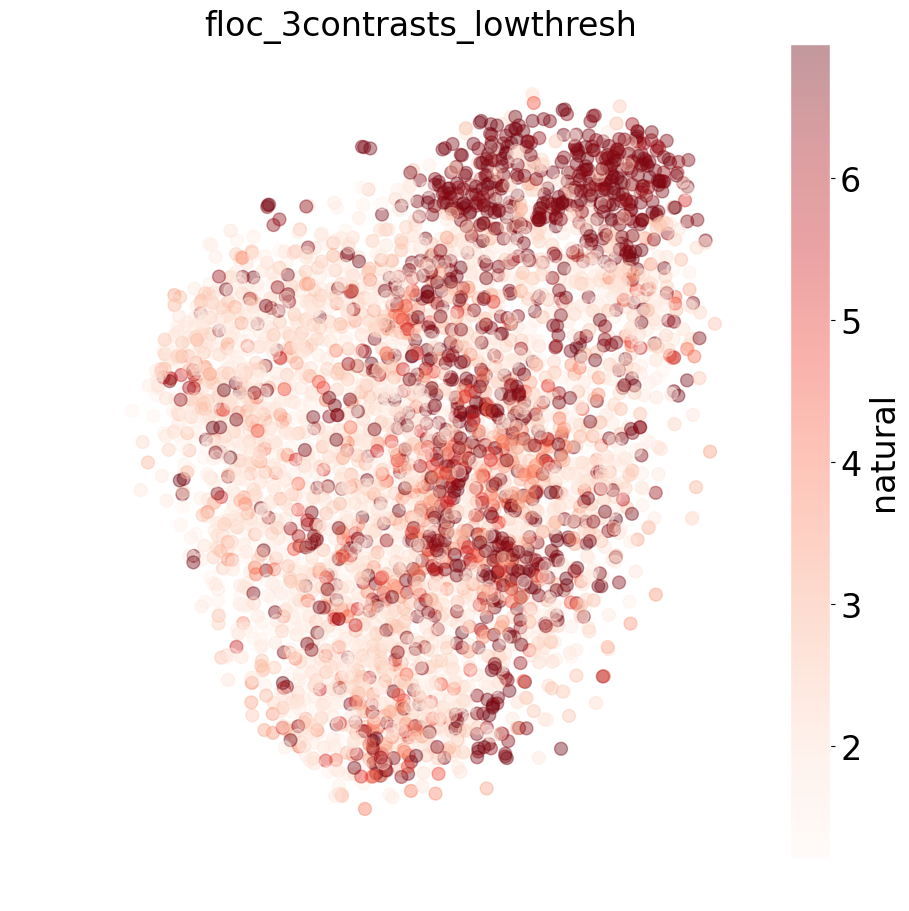

In [5]:
"""
Adjust the variables below. You can run this cell as many times as you want.
"""

#################################
# set save_fig to True to export 
# a .png file
#################################
save_fig = False 


##########################
# Choose GRADED annotation
# (continuous rating from THINGSplus)

# Choices:
# categ_natural        # shown in the paper
# categ_moves          # shown in the paper
# categ_size
# categ_precious
# categ_pleasant
# categ_manmade
# categ_living
# categ_hold
# categ_heavy
# categ_grasp
# categ_concreteness
# categ_be_moved
# categ_arousal
##########################
c_val = 'categ_natural'   


#################################
# set show_labels to True to display 
# the ROI name and a visible color bar

# Note: Set to False in the paper
#################################
show_labels = True


#################################
# Choose a color map 

# Any matplotlib cmap would work. 
# For the paper, we used 'Reds'

# Other suggestions include:
# 'Greens', 'Greys', 'Purples',
# 'YlGn', 'GnBu', 'PuBu', 'RdPu'
#################################
cmap = "Reds"    

  

###########################################
# Nothing to adjust beyond this point

# Figure size
fs = (9, 9)
graph_limits = graph_dimensions[res_type]

SMALLER_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALLER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title

# dot size
size_val = 85

# dot opacity
a_val = 0.4 if res_type == 'perImage' else 0.3

plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.linewidth"] = 1

fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

sc = ax.scatter(
    tsne_res_files[roi][:, 0],
    tsne_res_files[roi][:, 1],
    s = size_val,
    alpha = a_val,
    c=df_y[c_val],
    cmap=cmap,
)

ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

if show_labels:
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label(c_val.split("categ_")[-1])
    ax.set_title(roi)

ax.set_facecolor('xkcd:white')
ax.tick_params(axis='both', color="white", labelcolor='white')

if save_fig:
    cb = '_CB' if show_labels else ''
    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{c_val}{cb}.png', dpi=600)

plt.plot()    



### 3.3 | Generate 2-category t-SNE plots

Generate t-SNE plots with **categorical annotations** (2-color) based on image categorization. 

Plots are built from the dataframe created in 3.1 for a given subject, ROI and image-wise or trial-wise beta weights.


[]

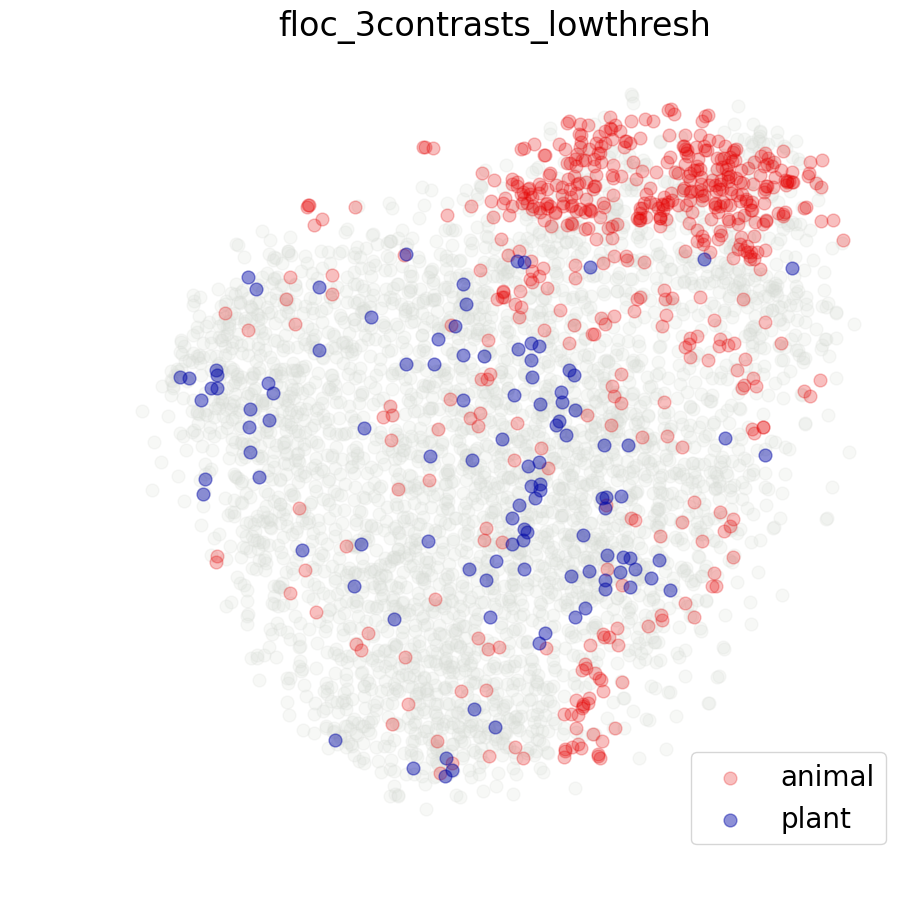

In [6]:
"""
Adjust the variables below. You can run this cell as many times as you want.

You need to select exactly TWO category labels to annotate the t-SNE plot
"""

#################################
# set save_fig to True to export 
# a .png file
#################################
save_fig = False 


################################################
# Select TWO category labels (categ1 and categ2)
# among the following CHOICES:

# 'manual_face':              face/facial feature(s) present in the image (human or not, natural or not, central or not)*
# 'manual_body':              body/body part present in the image (human or not, natural or not, central or not)*
# 'manual_human_face':        human face present in the image*
# 'manual_human_body':        human body/part present in the image*
# 'manual_nh_mammal_face':    mammal non-human face present in the image*
# 'manual_nh_mammal_body':    mammal non-human body/part present in the image*
# 'manual_central_face':      face (human or not) in the image center / focal point*
# 'manual_central_body':      body/part (human or not) in the image center / focal point*
# 'central_human_face':       human face in image center*
# 'central_human_body':       human body/part in image center*
# 'central_living':           human or animal face or body/part in image center*
# 'manual_artificial_face':   artificial face (drawing, doll, statue, robot, etc; human or not)*
# 'manual_artificial_body':   artificial body/part (drawing, doll, painting, etc; human or not)*
# 'manual_scene':             object is part of a scene with foreground & background, perspective*
# 'manual_rich_background':   object is shown with a detailed/busy background*
# 'manual_lone_object':       object of interest is shown centrally without any background*
# 'animal':                   animal category**
# 'arts and crafts supply':   'arts and crafts supply' category**
# 'electronic device':        'electronic device' category**
# 'clothing':                 clothing category**
# 'food':                     food category**
# 'plant':                    plant category**
# 'fruit':                    fruit category**
# 'vegetable':                vegetable category**
# 'tool':                     tool category**
# 'furniture':                furniture category**
# 'plant_fruit_veg':          plant or fruit or vegetable category**

# *manual annotations by MSL
# **THINGSplus 53 higher categories annotations
#################################
# In the paper:  ['animal', 'plant'] ; ['animal', 'vehicle'] 
# Other suggestions: ['tool', 'vehicle'] ;  ['manual_lone_object', 'manual_scene'] ; ['food', 'furniture']
categ1, categ2 = ['animal', 'plant']   



#################################
# set show_labels to True to display 
# the ROI name and a legend with 
# category labels

# Note: Set to False in the paper
#################################
show_labels = True


#################################
# Select a color scheme for the dot annotations
# Link to xkcd color survey results: https://xkcd.com/color/rgb/
#################################
nolabel_dot = 'xkcd:light grey'         # In paper: 'xkcd:light grey' 
categ1_dot = 'xkcd:red'                 # In paper: 'xkcd:red' 
categ2_dot = 'xkcd:cobalt blue'         # In paper: 'xkcd:cobalt blue' 
bothcateg_dot = 'xkcd:bright green'     # In paper: 'xkcd:bright green' 




#########################################################################
# Nothing to adjust beyond this point

# Compile color scheme
# c_list = ['xkcd:light grey', 'xkcd:red', 'xkcd:cobalt blue', 'xkcd:bright green']   # from the paper
c_list = [nolabel_dot, categ1_dot, categ2_dot, bothcateg_dot]


# Create data filters for category labels

bool_filter1 = df_y[categ1].to_numpy().astype(bool)
bool_filter2 = df_y[categ2].to_numpy().astype(bool)
overlap = np.sum(bool_filter1* bool_filter2)!=0

if overlap:
    overlap_filter = (bool_filter1 * bool_filter2).astype(bool)
bothcat_filter = (bool_filter1 + bool_filter2).astype(bool)


# Apply filters to obtain data points

md_c1 = tsne_res_files[roi][bool_filter1]
md_c2 = tsne_res_files[roi][bool_filter2]
md_none = tsne_res_files[roi][~bothcat_filter]


# Figure size
fs = (9, 9)
graph_limits = graph_dimensions[res_type]

SMALLER_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALLER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title

# dot size
size_val = 85
# dot opacity
a_vals = [0.2, 0.25, 0.45, 0.8] if res_type == 'perImage' else [0.1, 0.15, 0.35, 0.8]

plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.linewidth"] = 1

fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

ax.scatter(
    md_none[:, 0],
    md_none[:, 1],
    color=c_list[0],
    s = size_val,
    alpha = a_vals[0],
)
ax.scatter(
    md_c1[:, 0], 
    md_c1[:, 1], 
    color=c_list[1],
    s=size_val,
    alpha = a_vals[1],
    label=categ1,
)
ax.scatter(
    md_c2[:, 0],
    md_c2[:, 1],
    color=c_list[2],
    s=size_val,
    alpha = a_vals[2],
    label=categ2,
)

if overlap:
    md_over = tsne_res_files[roi][overlap_filter]
    ax.scatter(
        md_over[:, 0],
        md_over[:, 1],
        color=c_list[3],
        s=size_val,
        alpha = a_vals[3],
        label=f'{categ1} + {categ2}'
    )

ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

ax.set_facecolor('xkcd:white')
ax.tick_params(axis='both', color="white", labelcolor='white')

if show_labels:
    ax.set_title(roi)
    ax.legend(loc='lower right')

if save_fig:
    sl = '_L' if show_labels else ''
    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{categ1}_{categ2}{sl}.png', dpi=600)

plt.plot()    
        
        